In [1]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.4 LTS

Matrix products: default
BLAS/LAPACK: /home/garret/anaconda3/envs/HR/lib/libopenblasp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.6.3    ellipsis_0.3.1    IRdisplay_0.7.0   pbdZMQ_0.3-3     
 [5] tools_3.6.3       htmltools_0.5.1.1 pillar_1.4.7      base64enc_0.1-3  
 [9] crayon_1.4.0      uuid_0.1-4        IRkernel_1.3      jsonlite_1.7.2   
[13] digest_0.6.27     lifecycle_0.2.0   repr_1.1.0    

In [2]:
.libPaths()

[1] "/home/garret/anaconda3/envs/HR/lib/R/library"

In [2]:
library(Seurat)
library(dplyr)
library(magrittr)
IRdisplay::display_html("<style> .container { width:95% !important; } </style>")
library("xlsx")
#library(mgsa)
library(dplyr) 
library(ggplot2)
library(ggpmisc)
library(scales)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
MPOA.integrated<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/MPOA.integrated.rds")
P23M<-readRDS(file ="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23M.rds")
P35M<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35M.rds")
AM<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AM.rds")
Cast<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/Cast.rds")
P23F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P23F.rds")
P35F<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/P35F.rds")
AF<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/AF.rds")
OVX<-readRDS(file = "/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/OVX.rds")

# assgin clusters to cell types

In [4]:
new.ident <- c("Mix1","Vgat1","Vglu1","Vgat2","Vgat3","Vgat4","Mix2","Vglu2","Vgat5","Vglu3","Vglu4","Vgat6","Vgat7","Vgat8","Vglu5","Vglu6","Vgat9","Vgat10","Vgat11","Vglu7","Vgat12","Vgat13","Vgat14","Vgat15","Vglu8","Vglu9","Vgat16","Vglu10","Vgat17","Vgat18","Vgat19","Vglu11","Vglu12","Ambiguous1","Mix3","Vgat20")
names(x = new.ident) <- levels(x =MPOA.integrated)
MPOA.integrated<- RenameIdents(object =MPOA.integrated, new.ident)

# Cell type analysis in each condition

In [5]:
#identifying cluster barcodes in each condition
# exp. Oligo_1_barcode_ctrl gives all barcodes in it
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(MPOA.integrated@assays$RNA@data[,which(Idents(object=MPOA.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_P23M",sep=""),intersect(colnames(P23M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35M",sep=""),intersect(colnames(P35M@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AM",sep=""),intersect(colnames(AM@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_Cast",sep=""),intersect(colnames(Cast@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P23F",sep=""),intersect(colnames(P23F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_P35F",sep=""),intersect(colnames(P35F@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_AF",sep=""),intersect(colnames(AF@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_OVX",sep=""),intersect(colnames(OVX@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

# Dataframe for analyzing hormonal receptor and DEG per cluster

In [6]:
celltype<- vector(mode="character")
for (i in 1:dim(MPOA.integrated@meta.data)[1]){
celltype[i]<-new.ident[as.numeric(MPOA.integrated@meta.data$integrated_snn_res.0.8[i])]} # do not need +1
MPOA.integrated@meta.data$celltype<-celltype

In [7]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

Cell_number<- data.frame("type" =Cell_type)

AM_Cast<-vector(mode="numeric", length=0)
AM_Cast_activity<-vector(mode="numeric", length=0)
#AM_P23<-vector(mode="numeric", length=0)
#AM_both<-vector(mode="numeric", length=0)
AM_Esr1<-vector(mode="numeric", length=0)
AM_Ar<-vector(mode="numeric", length=0)
AM_Pgr<-vector(mode="numeric", length=0)
AM_Prlr<-vector(mode="numeric", length=0)
AM_Nr3c1<-vector(mode="numeric", length=0)
AM_Nr3c2<-vector(mode="numeric", length=0)
AM_Nr2c2<-vector(mode="numeric", length=0)
AM_Esr1_Ar<-vector(mode="numeric", length=0)
AM_cell<-vector(mode="numeric", length=0)

AF_OVX<-vector(mode="numeric", length=0)
AF_OVX_activity<-vector(mode="numeric", length=0)
#AF_P23<-vector(mode="numeric", length=0)
#AF_both<-vector(mode="numeric", length=0)
AF_Esr1<-vector(mode="numeric", length=0)
AF_Ar<-vector(mode="numeric", length=0)
AF_Pgr<-vector(mode="numeric", length=0)
AF_Prlr<-vector(mode="numeric", length=0)
AF_Nr3c1<-vector(mode="numeric", length=0)
AF_Nr2c2<-vector(mode="numeric", length=0)
AF_Nr3c2<-vector(mode="numeric", length=0)
AF_Esr1_Ar<-vector(mode="numeric", length=0)
AF_cell<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){
#AM_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AM_over_P23M/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AM_Cast_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AM_over_Cast/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
#OverlapM<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/Overlap/AM_over_Cast_&_P23M/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)  
#AM_P23[i]<-dim(AM_23_gene)[1]   
AM_Cast[i]<-dim(AM_Cast_gene)[1]  
AM_Cast_activity[i]<-sum(AM_Cast_gene$avg_logFC)
#AM_both[i]<-dim(OverlapM)[1] 
AM_Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
AM_Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
AM_Pgr[i]<-100*sum(MPOA.integrated@assays$RNA["Pgr",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
AM_Prlr[i]<-100*sum(MPOA.integrated@assays$RNA["Prlr",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
AM_Nr3c1[i]<-100*sum(MPOA.integrated@assays$RNA["Nr3c1",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
AM_Nr3c2[i]<-100*sum(MPOA.integrated@assays$RNA["Nr3c2",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
AM_Nr2c2[i]<-100*sum(MPOA.integrated@assays$RNA["Nr2c2",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))
AM_Esr1_Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0 & MPOA.integrated@assays$RNA["Ar",rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i])))  
AM_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))[1]  

#AF_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AF_over_P23F/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AF_OVX_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AF_over_OVX/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
#OverlapF<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/Overlap/AF_over_OVX_&_P23F/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)  
#AF_P23[i]<-dim(AF_23_gene)[1]   
AF_OVX[i]<-dim(AF_OVX_gene)[1] 
AF_OVX_activity[i]<-sum(AF_OVX_gene$avg_logFC)
#AF_both[i]<-dim(OverlapF)[1]    
AF_Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
AF_Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
AF_Pgr[i]<-100*sum(MPOA.integrated@assays$RNA["Pgr",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
AF_Prlr[i]<-100*sum(MPOA.integrated@assays$RNA["Prlr",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
AF_Nr3c1[i]<-100*sum(MPOA.integrated@assays$RNA["Nr3c1",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
AF_Nr2c2[i]<-100*sum(MPOA.integrated@assays$RNA["Nr2c2",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
AF_Nr3c2[i]<-100*sum(MPOA.integrated@assays$RNA["Nr3c2",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))
AF_Esr1_Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0 & MPOA.integrated@assays$RNA["Ar",rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i])))     
AF_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))[1]   }

Cell_number$AM_cell<-AM_cell
#Cell_number$AM_P23<-AM_P23
Cell_number$AM_Cast<-AM_Cast
Cell_number$AM_Cast_activity<-AM_Cast_activity
#Cell_number$AM_both<-AM_both
Cell_number$AM_Esr1<-AM_Esr1
Cell_number$AM_Ar<-AM_Ar
Cell_number$AM_Pgr<-AM_Pgr
Cell_number$AM_Nr3c1<-AM_Nr3c1
Cell_number$AM_Nr2c2<-AM_Nr2c2
Cell_number$AM_Nr3c2<-AM_Nr3c2
Cell_number$AM_Prlr<-AM_Prlr
Cell_number$AM_Esr1_Ar<-AM_Esr1_Ar
Cell_number$AM_cell<-AM_cell

Cell_number$AF_cell<-AF_cell
#Cell_number$AF_P23<-AF_P23
Cell_number$AF_OVX<-AF_OVX
Cell_number$AF_OVX_activity<-AF_OVX_activity
#Cell_number$AF_both<-AF_both
Cell_number$AF_Esr1<-AF_Esr1
Cell_number$AF_Ar<-AF_Ar
Cell_number$AF_Pgr<-AF_Pgr
Cell_number$AF_Prlr<-AF_Prlr
Cell_number$AF_Nr3c1<-AF_Nr3c1
Cell_number$AF_Nr2c2<-AF_Nr2c2
Cell_number$AF_Nr3c2<-AF_Nr3c2
Cell_number$AF_Esr1_Ar<-AF_Esr1_Ar
Cell_number$AF_cell<-AF_cell
#as.factor(Cell_number$type)

In [10]:
Cell_number_Vgat<-subset(Cell_number, type %in% c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))
Cell_number_Vglu<-subset(Cell_number, type %in% c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12"))

In [8]:
Cell_number_Vgat

,type,AM_cell,AM_Cast,AM_Cast_activity,AM_Esr1,AM_Ar,AM_Pgr,AM_Nr3c1,AM_Nr2c2,AM_Nr3c2,⋯,AF_OVX,AF_OVX_activity,AF_Esr1,AF_Ar,AF_Pgr,AF_Prlr,AF_Nr3c1,AF_Nr2c2,AF_Nr3c2,AF_Esr1_Ar
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Vgat1,119,17,10.0795752,10.084034,26.890756,34.453782,15.12605,14.28571,2.521008,⋯,14,8.0809127,16.265060,20.481928,25.301205,54.216867,10.240964,10.843373,0.000000,4.216867
2,Vgat2,105,62,23.1801303,61.904762,87.619048,89.523810,46.66667,48.57143,8.571429,⋯,37,15.0736581,89.156627,89.156627,91.566265,77.108434,63.855422,44.578313,7.228916,78.313253
3,Vgat3,110,12,6.0946878,4.545455,15.454545,18.181818,19.09091,18.18182,2.727273,⋯,1,0.3365052,3.508772,9.649123,8.771930,35.087719,7.894737,14.035088,0.877193,0.877193
4,Vgat4,78,31,16.3452145,58.974359,80.769231,79.487179,52.56410,44.87179,3.846154,⋯,88,37.1611226,87.200000,86.400000,73.600000,92.800000,71.200000,46.400000,1.600000,76.000000
5,Vgat5,106,9,2.9583867,1.886792,47.169811,19.811321,38.67925,34.90566,14.150943,⋯,1,0.3106176,1.851852,57.407407,31.481481,25.925926,29.629630,48.148148,12.962963,0.000000
6,Vgat6,97,14,7.2416961,39.175258,65.979381,29.896907,42.26804,28.86598,5.154639,⋯,6,3.8131341,48.453608,64.948454,17.525773,65.979381,38.144330,31.958763,3.092784,40.206186
7,Vgat7,141,5,1.6185357,12.056738,36.170213,28.368794,41.13475,31.20567,4.964539,⋯,2,0.7016465,3.809524,41.904762,15.238095,24.761905,33.333333,26.666667,1.904762,1.904762
8,Vgat8,138,10,4.0968837,4.347826,53.623188,34.057971,56.52174,35.50725,10.869565,⋯,1,0.4018177,6.666667,55.000000,41.666667,81.666667,53.333333,33.333333,10.000000,3.333333
9,Vgat9,157,7,2.2249077,8.917197,42.675159,25.477707,47.77070,45.22293,3.184713,⋯,1,0.4938543,22.857143,54.285714,42.857143,51.428571,37.142857,48.571429,2.857143,17.142857


In [9]:
gene<-"Nr3c2"
fit1 <- lm(eval(parse(text = paste("AM_",gene,sep=""))) ~ AM_Cast, data = Cell_number_Vgat) 

In [10]:
signif(summary(fit1)$adj.r.squared, 2)

[1] -0.055

`geom_smooth()` using formula 'y ~ x'

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
`geom_smooth()` using formula 'y ~ x'

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


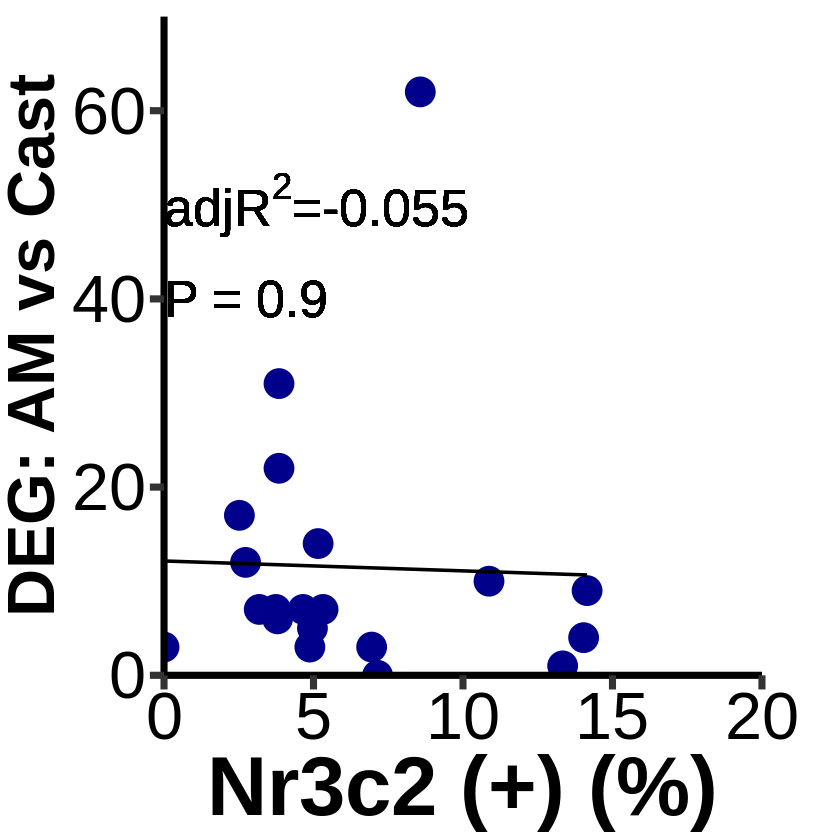

In [12]:
R2.exp <-expression(paste("adj","",R^2,"=", "-0.055"))#need to adjust
ggplot(Cell_number_Vgat,aes(x=eval(parse(text = paste("AM_",gene,sep=""))),y=AM_Cast))+geom_point(size=8,color='darkblue') +geom_smooth(method = "lm", se = FALSE,color="black", fill="orange")+xlab(paste(gene," (+) (%)",sep=""))+ylab("DEG: AM vs Cast")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,color="black"),axis.text.y=element_text(size=40, hjust = 1,color="black"),axis.title=element_text(size=40,face="bold"),axis.title.x=element_text(size=50,face="bold",color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 47, 5,5))+
scale_x_continuous(expand = c(0, 0), limits = c(0,20)) + scale_y_continuous(expand = c(0, 0), limits = c(0,70))+
geom_text( aes(x = 0, y = 50), hjust = 0,label =R2.exp,size=11)+
geom_text( aes(x = 0, y = 40), hjust = 0,label = paste("P =",signif(summary(fit1)$coef[2,4], 2)),size=11)

ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/male/correlation_DEGs_AM_over_Cast_",gene,"_Vgat_ylim70_x20.pdf",sep=""),width=5,height=6)

# Vglut2

In [44]:
gene<-"Nr3c2"
fit1 <- lm(eval(parse(text = paste("AM_",gene,sep=""))) ~ AM_Cast, data = Cell_number_Vglu) 
signif(summary(fit1)$adj.r.squared, 2)

[1] 0.17

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

`geom_smooth()` using formula 'y ~ x'

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
`geom_smooth()` using formula 'y ~ x'

Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


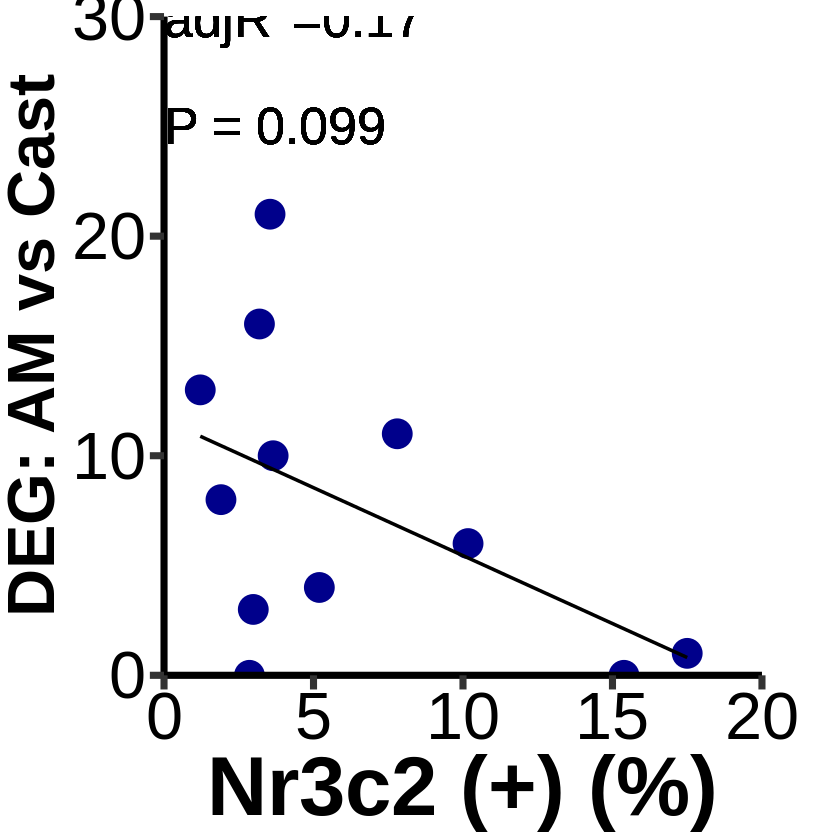

In [47]:
R2.exp <-expression(paste("adj","",R^2,"=", "0.17"))#need to adjust
ggplot(Cell_number_Vglu,aes(x=eval(parse(text = paste("AM_",gene,sep=""))),y=AM_Cast))+geom_point(size=8,color='darkblue') +geom_smooth(method = "lm", se = FALSE,color="black", fill="orange")+ylim(-5,40)+xlab(paste(gene," (+) (%)",sep=""))+ylab("DEG: AM vs Cast")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,color="black"),axis.text.y=element_text(size=40, hjust = 1,color="black"),axis.title=element_text(size=40,face="bold"),axis.title.x=element_text(size=50,face="bold",color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 47, 5,5))+
scale_x_continuous(expand = c(0, 0), limits = c(0,20)) + scale_y_continuous(expand = c(0, 0), limits = c(0,30))+
geom_text( aes(x = 0, y = 30), hjust = 0,label =R2.exp,size=11)+
geom_text( aes(x = 0, y = 25), hjust = 0,label = paste("P =",signif(summary(fit1)$coef[2,4], 2)),size=11)

ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/male/Vglu/correlation_DEGs_AM_over_Cast_",gene,"_Vglu_x20_y30.pdf",sep=""),width=5,height=6)

In [211]:
color<-numeric()
for(i in 1:dim(Cell_number_Vgat)[1]){
    if(Cell_number_Vgat$AM_Esr1[i]>50 & Cell_number_Vgat$AM_Ar[i]>50){color[i]<-"gold1"}
    else if(Cell_number_Vgat$AM_Esr1[i]<10 & Cell_number_Vgat$AM_Ar[i]>50){color[i]<-"darkgreen"}
        else if(Cell_number_Vgat$AM_Esr1[i]<10 & Cell_number_Vgat$AM_Ar[i]<10){color[i]<-"grey"}
            else{color[i]<-"black"}
}

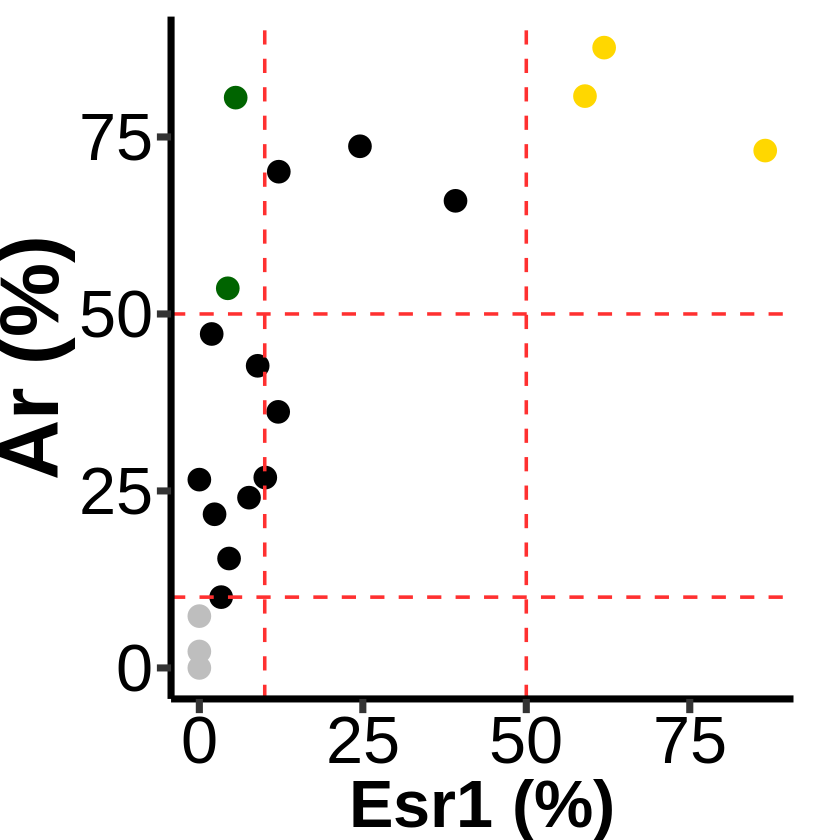

In [212]:
ggplot(Cell_number_Vgat,aes(x=AM_Esr1,y=AM_Ar))+geom_point(size=6,color=color) +xlab("Esr1 (%)")+ylab("Ar (%)")+theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 28, 0, 0))+
geom_hline(yintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)+geom_vline(xintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/male/Esr1_AR_proportion.pdf",width=5,height=6)

In [ ]:
#female


In [86]:
gene<-"Pgr"
fit1 <- lm(eval(parse(text = paste("AF_",gene,sep=""))) ~ AF_OVX, data = Cell_number_Vgat) 

In [87]:
signif(summary(fit1)$adj.r.squared, 2)

[1] 0.41

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing missing values (geom_smooth).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 10 rows containing missing values (geom_smooth).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


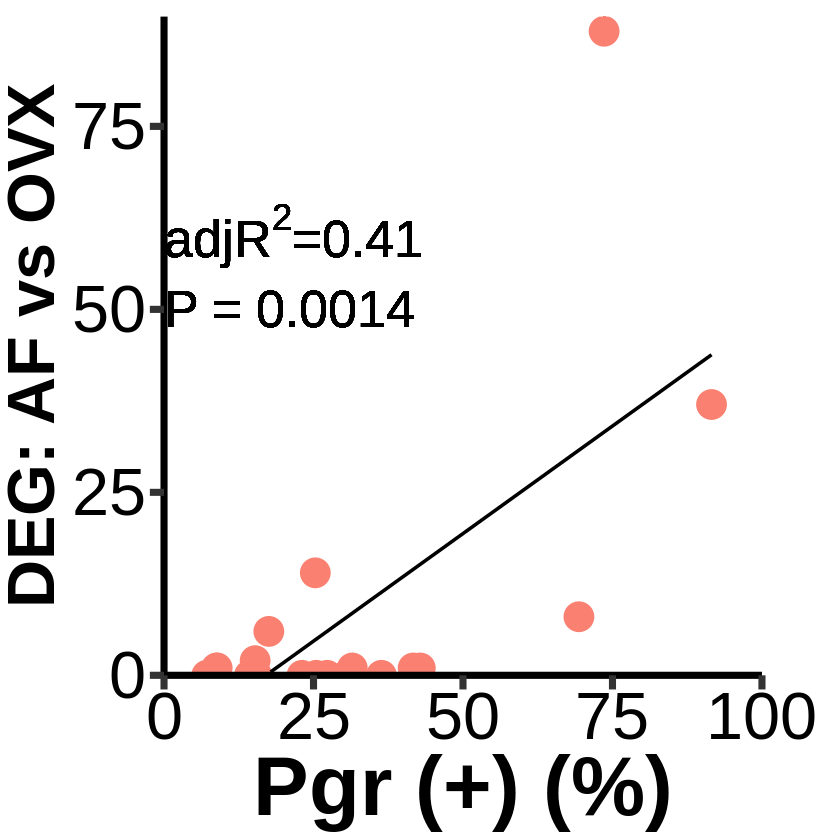

In [88]:
R2.exp <-expression(paste("adj","",R^2,"=", "0.41"))#need to adjust
ggplot(Cell_number_Vgat,aes(x=eval(parse(text = paste("AF_",gene,sep=""))),y=AF_OVX))+geom_point(size=8,color='salmon') +geom_smooth(method = "lm", se = FALSE,color="black", fill="orange")+xlab(paste(gene," (+) (%)",sep=""))+ylab("DEG: AF vs OVX")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,color="black"),axis.text.y=element_text(size=40, hjust = 1,color="black"),axis.title=element_text(size=40,face="bold"),axis.title.x=element_text(size=50,face="bold",color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 47, 5,5))+
scale_x_continuous(expand = c(0, 0), limits = c(0,100)) + scale_y_continuous(expand = c(0, 0), limits = c(0,90))+
geom_text( aes(x = 0, y = 60), hjust = 0,label =R2.exp,size=11)+#xlim(0,20)+
geom_text( aes(x = 0, y = 50), hjust = 0,label = paste("P =",signif(summary(fit1)$coef[2,4], 2)),size=11)
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/female/correlation_DEGs_AF_over_OVX_",gene,"_Vgat_x100_y90.pdf",sep=""),width=5,height=6)

Vglu

In [70]:
gene<-"Nr3c2"
fit1 <- lm(eval(parse(text = paste("AF_",gene,sep=""))) ~ AF_OVX, data = Cell_number_Vglu) 

In [71]:
signif(summary(fit1)$adj.r.squared, 2)

[1] -0.033

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 7 rows containing missing values (geom_smooth).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 7 rows containing missing values (geom_smooth).”
Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'expression'”


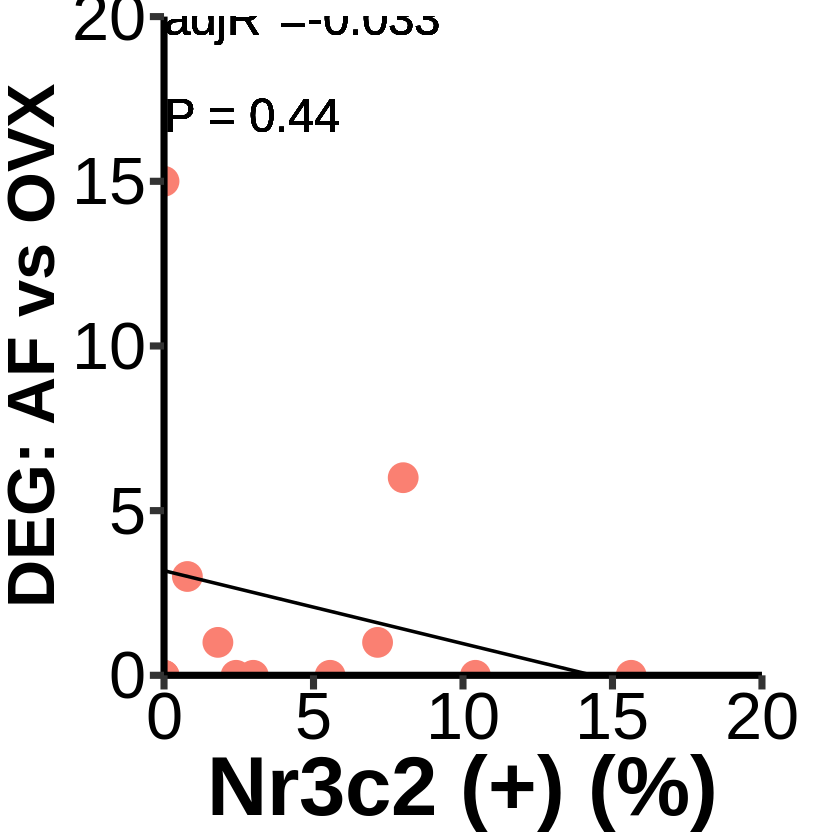

In [72]:
R2.exp <-expression(paste("adj","",R^2,"=", "-0.033"))#need to adjust
ggplot(Cell_number_Vglu,aes(x=eval(parse(text = paste("AF_",gene,sep=""))),y=AF_OVX))+geom_point(size=8,color='salmon') +geom_smooth(method = "lm", se = FALSE,color="black", fill="orange")+xlab(paste(gene," (+) (%)",sep=""))+ylim(-5,30)+ylab("DEG: AF vs OVX")+
theme(axis.text.x=element_text(size=40, hjust = 0.5,color="black"),axis.text.y=element_text(size=40, hjust = 1,color="black"),axis.title=element_text(size=40,face="bold"),axis.title.x=element_text(size=50,face="bold",color="black"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(),axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 47, 5,5))+
scale_x_continuous(expand = c(0, 0), limits = c(0,20)) + scale_y_continuous(expand = c(0, 0), limits = c(0,20))+
geom_text( aes(x = 0, y = 20), hjust = 0,label =R2.exp,size=10)+
geom_text( aes(x = 0, y = 17), hjust = 0,label = paste("P =",signif(summary(fit1)$coef[2,4], 2)),size=10)
ggsave(file=paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/female/Vglu/correlation_DEGs_AF_over_OVX_",gene,"_Vglut_x20_y20.pdf",sep=""),width=5,height=6,paper="letter")

In [204]:
color<-numeric()
for(i in 1:dim(Cell_number_Vgat)[1]){
    if(Cell_number_Vgat$AF_Esr1[i]>50 & Cell_number_Vgat$AF_Ar[i]>50){color[i]<-"gold1"}
    else if(Cell_number_Vgat$AF_Esr1[i]<10 & Cell_number_Vgat$AF_Ar[i]>50){color[i]<-"darkgreen"}
        else if(Cell_number_Vgat$AF_Esr1[i]<10 & Cell_number_Vgat$AF_Ar[i]<10){color[i]<-"grey"}
            else{color[i]<-"black"}
}

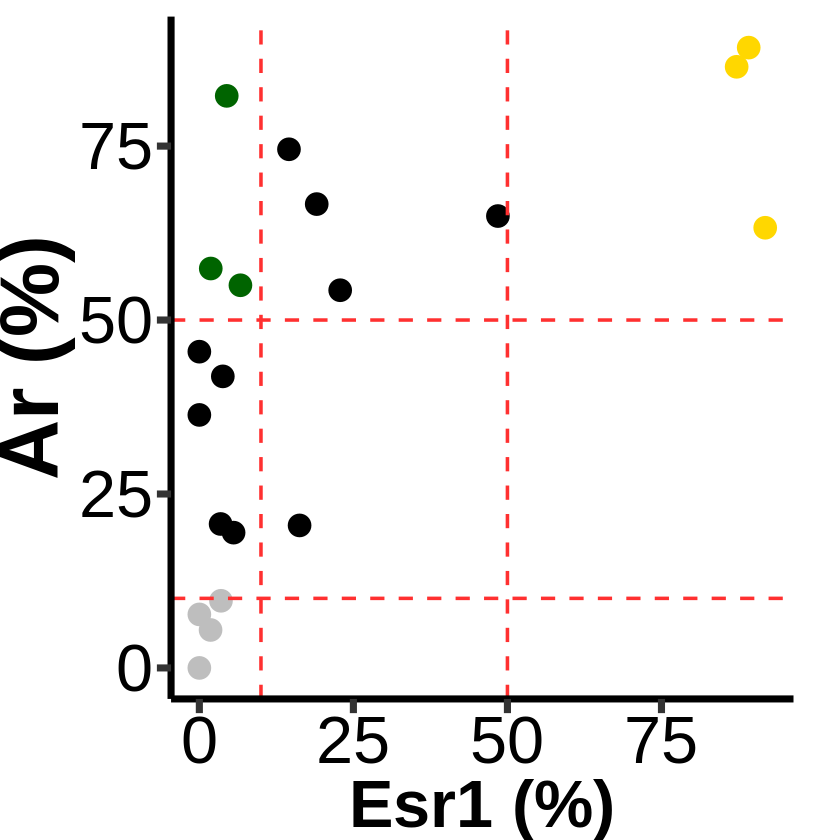

In [210]:
ggplot(Cell_number_Vgat,aes(x=AF_Esr1,y=AF_Ar))+geom_point(size=6,color=color) +xlab("Esr1 (%)")+ylab("Ar (%)")+theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 28, 0, 0))+
geom_hline(yintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)+geom_vline(xintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/female/Esr1_AR_proportion.pdf",width=5,height=6)

In [10]:
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="AF")))

In [11]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20")

Cell_number<- data.frame("type" =Cell_type)


Esr1<-vector(mode="numeric", length=0)
Ar<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){

Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i])))
Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i])))
}

Cell_number$Ar<-Ar

Cell_number$Esr1<-Esr1

In [12]:
color<-numeric()
for(i in 1:dim(Cell_number)[1]){
    if(Cell_number$Esr1[i]>50 & Cell_number$Ar[i]>50){color[i]<-"gold3"}
    else if(Cell_number$Esr1[i]<10 & Cell_number$Ar[i]>50){color[i]<-"darkgreen"}
        else if(Cell_number$Esr1[i]<10 & Cell_number$Ar[i]<10){color[i]<-"grey"}
            else{color[i]<-"black"}
}

In [13]:
Cell_number

type,Ar,Esr1
<fct>,<dbl>,<dbl>
Vgat1,23.157895,13.684211
Vgat2,88.297872,73.936170
Vgat3,12.500000,4.017857
Vgat4,84.236453,76.354680
Vgat5,50.625000,1.875000
Vgat6,65.463918,43.814433
Vgat7,38.617886,8.536585
Vgat8,54.040404,5.050505
Vgat9,44.791667,11.458333


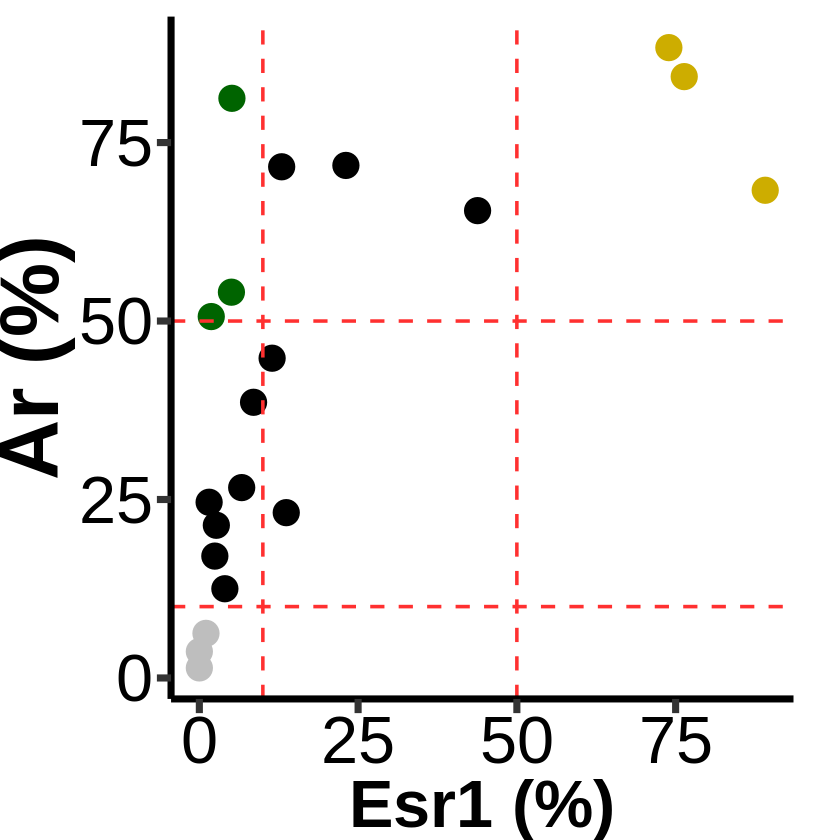

In [13]:
ggplot(Cell_number,aes(x=Esr1,y=Ar))+geom_point(size=7,color=color) +xlab("Esr1 (%)")+ylab("Ar (%)")+theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 28, 0, 0))+
geom_hline(yintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)+geom_vline(xintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/Esr1_AR_proportion.pdf",width=6,height=6.5,paper="letter")

In [9]:
write.xlsx(Cell_number,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/esr1arproportionAMAF.xlsx")

In [12]:
#both sex, Vglut

In [13]:
MPOA.integrated<-subset(MPOA.integrated,cells=rownames(subset(MPOA.integrated@meta.data,stim=="AM" | stim=="AF")))

In [14]:
Cell_type<-c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

Cell_number<- data.frame("type" =Cell_type)


Esr1<-vector(mode="numeric", length=0)
Ar<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){

Esr1[i]<-100*sum(MPOA.integrated@assays$RNA["Esr1",rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i])))
Ar[i]<-100*sum(MPOA.integrated@assays$RNA["Ar",rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i]))]>0)/length(rownames(subset(MPOA.integrated@meta.data,celltype==Cell_type[i])))
}

Cell_number$Ar<-Ar

Cell_number$Esr1<-Esr1

In [15]:
Cell_number

type,Ar,Esr1
<fct>,<dbl>,<dbl>
Vglu1,8.191126,2.389078
Vglu2,35.454545,19.090909
Vglu3,20.833333,3.703704
Vglu4,71.153846,43.269231
Vglu5,60.309278,29.896907
Vglu6,55.026455,11.111111
Vglu7,33.333333,13.194444
Vglu8,38.775510,11.224490
Vglu9,83.516484,7.692308


In [16]:
color<-numeric()
for(i in 1:dim(Cell_number)[1]){
    if(Cell_number$Esr1[i]>50 & Cell_number$Ar[i]>50){color[i]<-"gold3"}
    else if(Cell_number$Esr1[i]<10 & Cell_number$Ar[i]>50){color[i]<-"darkgreen"}
        else if(Cell_number$Esr1[i]<10 & Cell_number$Ar[i]<10){color[i]<-"grey"}
            else{color[i]<-"black"}
}

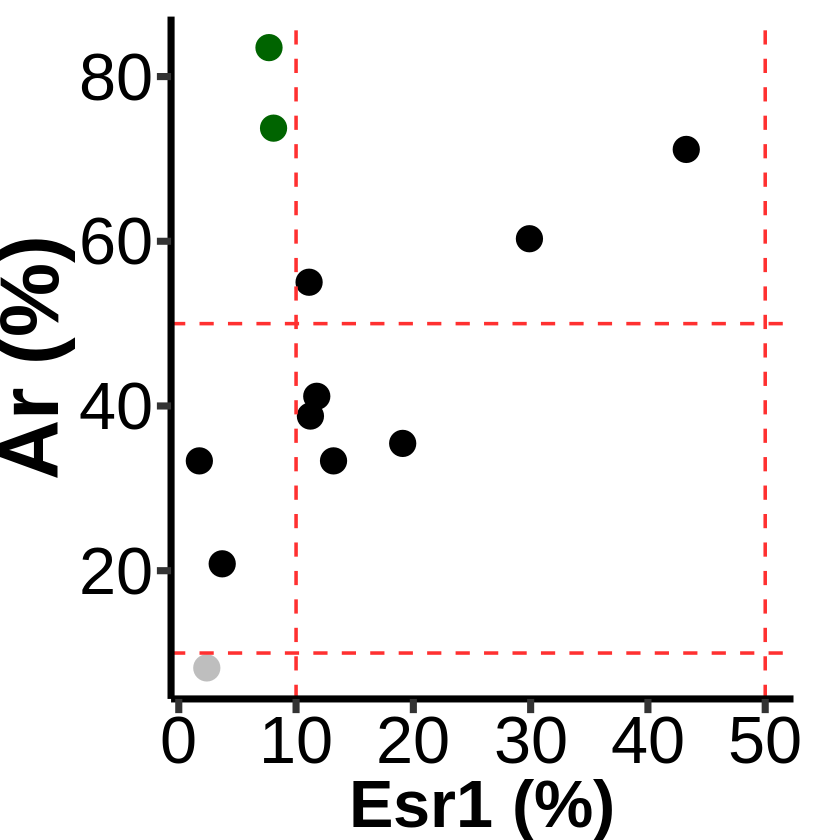

In [17]:
#Esr1>20 % 4,5
ggplot(Cell_number,aes(x=Esr1,y=Ar))+geom_point(size=7,color=color) +xlab("Esr1 (%)")+ylab("Ar (%)")+theme(axis.text.x=element_text(size=40, hjust = 0.5,colour = "black"),axis.text.y=element_text(size=40, hjust = 1,colour = "black"),axis.title.y=element_text(size=50,face="bold"),axis.title.x=element_text(size=40,face="bold"),plot.title = element_text(size=22),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=2),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 2), plot.margin = margin(10, 28, 0, 0))+
geom_hline(yintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)+geom_vline(xintercept=c(10,50), linetype="dashed", color = "firebrick1", size=1)
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/Esr1_AR_proportion_vglut.pdf",width=6,height=6.5,paper="letter")

In [18]:
write.xlsx(Cell_number,file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/esr1arproportionAMAF_vglut.xlsx")

# number of DEGs

In [ ]:
#Vgat

In [41]:
Cell_number_Vgat

,type,AM_cell,AM_Cast,AM_Cast_activity,AM_Esr1,AM_Ar,AM_Pgr,AM_Nr3c1,AM_Nr2c2,AM_Nr3c2,⋯,AF_OVX,AF_OVX_activity,AF_Esr1,AF_Ar,AF_Pgr,AF_Prlr,AF_Nr3c1,AF_Nr2c2,AF_Nr3c2,AF_Esr1_Ar
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Vgat1,119,17,10.0795752,10.084034,26.890756,34.453782,15.12605,14.28571,2.521008,⋯,14,8.0809127,16.265060,20.481928,25.301205,54.216867,10.240964,10.843373,0.000000,4.216867
2,Vgat2,105,62,23.1801303,61.904762,87.619048,89.523810,46.66667,48.57143,8.571429,⋯,37,15.0736581,89.156627,89.156627,91.566265,77.108434,63.855422,44.578313,7.228916,78.313253
3,Vgat3,110,12,6.0946878,4.545455,15.454545,18.181818,19.09091,18.18182,2.727273,⋯,1,0.3365052,3.508772,9.649123,8.771930,35.087719,7.894737,14.035088,0.877193,0.877193
4,Vgat4,78,31,16.3452145,58.974359,80.769231,79.487179,52.56410,44.87179,3.846154,⋯,88,37.1611226,87.200000,86.400000,73.600000,92.800000,71.200000,46.400000,1.600000,76.000000
5,Vgat5,106,9,2.9583867,1.886792,47.169811,19.811321,38.67925,34.90566,14.150943,⋯,1,0.3106176,1.851852,57.407407,31.481481,25.925926,29.629630,48.148148,12.962963,0.000000
6,Vgat6,97,14,7.2416961,39.175258,65.979381,29.896907,42.26804,28.86598,5.154639,⋯,6,3.8131341,48.453608,64.948454,17.525773,65.979381,38.144330,31.958763,3.092784,40.206186
7,Vgat7,141,5,1.6185357,12.056738,36.170213,28.368794,41.13475,31.20567,4.964539,⋯,2,0.7016465,3.809524,41.904762,15.238095,24.761905,33.333333,26.666667,1.904762,1.904762
8,Vgat8,138,10,4.0968837,4.347826,53.623188,34.057971,56.52174,35.50725,10.869565,⋯,1,0.4018177,6.666667,55.000000,41.666667,81.666667,53.333333,33.333333,10.000000,3.333333
9,Vgat9,157,7,2.2249077,8.917197,42.675159,25.477707,47.77070,45.22293,3.184713,⋯,1,0.4938543,22.857143,54.285714,42.857143,51.428571,37.142857,48.571429,2.857143,17.142857


In [31]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20")

In [29]:
Cell_number_Vgat_M<-Cell_number_Vgat[,c("type","AM_Cast")]
Cell_number_Vgat_F<-Cell_number_Vgat[,c("type","AF_OVX")]
colnames(Cell_number_Vgat_M)<-c("type","DEG")
colnames(Cell_number_Vgat_F)<-c("type","DEG")
Cell_number_Vgat_M$Sex<-"P50M_vs_Cast"
Cell_number_Vgat_F$Sex<-"P50F_vs_OVX"
Cell_number_Vgat_comb<-rbind(Cell_number_Vgat_M,Cell_number_Vgat_F)

In [32]:
Cell_number_Vgat_comb$type<-factor(Cell_number_Vgat_comb$type,levels=Cell_type)

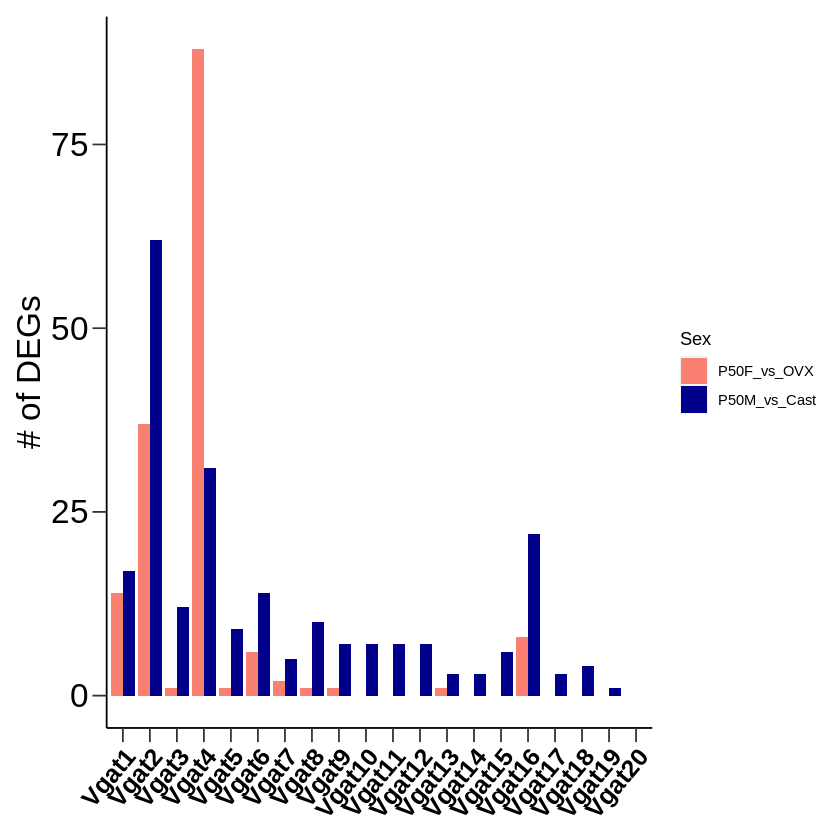

In [34]:
ggplot(Cell_number_Vgat_comb,aes(x=type,y=DEG,fill=Sex))+geom_bar(stat="identity", position=position_dodge())+
ylab("# of DEGs")+ scale_fill_manual(values=c('salmon','dark blue'))+
theme(axis.title.y=element_text(size=20),axis.title.x=element_blank(),axis.text.y=element_text(size=20,color="black"),axis.text.x=element_text(size=15,angle = 50, hjust = 1,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 0.5), plot.margin = margin(10, 10, 10, 10))+ 
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/number_of_DEGs_P50_vs_GDX_Vgat_clusters.pdf",width=10,height=6,paper="letter")

In [ ]:
#Vglu

In [35]:
Cell_type<-c("Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

In [36]:
Cell_number_Vglu_M<-Cell_number_Vglu[,c("type","AM_Cast")]
Cell_number_Vglu_F<-Cell_number_Vglu[,c("type","AF_OVX")]
colnames(Cell_number_Vglu_M)<-c("type","DEG")
colnames(Cell_number_Vglu_F)<-c("type","DEG")
Cell_number_Vglu_M$Sex<-"P50M_vs_Cast"
Cell_number_Vglu_F$Sex<-"P50F_vs_OVX"
Cell_number_Vglu_comb<-rbind(Cell_number_Vglu_M,Cell_number_Vglu_F)

In [38]:
Cell_number_Vglu_comb$type<-factor(Cell_number_Vglu_comb$type,levels=Cell_type)

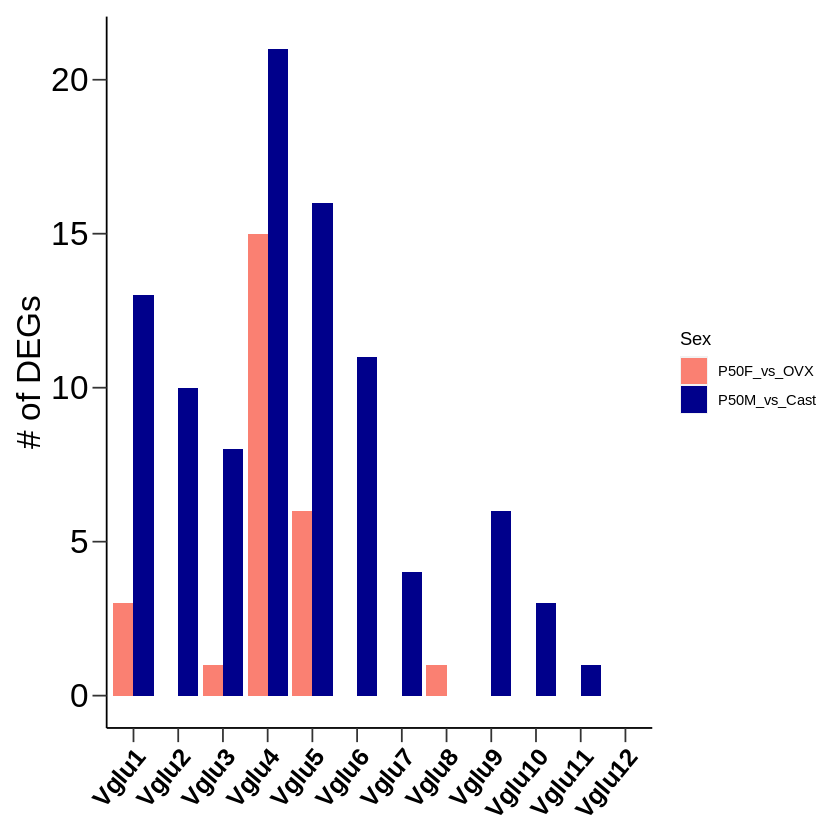

In [40]:
ggplot(Cell_number_Vglu_comb,aes(x=type,y=DEG,fill=Sex))+geom_bar(stat="identity", position=position_dodge())+
ylab("# of DEGs")+ scale_fill_manual(values=c('salmon','dark blue'))+
theme(axis.title.y=element_text(size=20),axis.title.x=element_blank(),axis.text.y=element_text(size=20,color="black"),axis.text.x=element_text(size=15,angle = 50, hjust = 1,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=0.5),axis.ticks.length=unit(.3, "cm"),axis.ticks = element_line(size = 0.5), plot.margin = margin(10, 10, 10, 10))+ 
ggsave(file="/media/garret/New Volume/paper submission/MPOA_Science/Revision_Figures/raw/number_of_DEGs_P50_vs_GDX_Vglut_clusters.pdf",width=10,height=6,paper="letter")

# visualizing P35M/P50 vs Cast across cell type

In [84]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

Cell_number<- data.frame("type" =Cell_type)

AM_Cast<-vector(mode="numeric", length=0)
AM_Cast_activity<-vector(mode="numeric", length=0)
AM_cell<-vector(mode="numeric", length=0)

P35M_Cast<-vector(mode="numeric", length=0)
P35M_Cast_activity<-vector(mode="numeric", length=0)
P35M_cell<-vector(mode="numeric", length=0)

AF_OVX<-vector(mode="numeric", length=0)
AF_OVX_activity<-vector(mode="numeric", length=0)
AF_cell<-vector(mode="numeric", length=0)

P35F_OVX<-vector(mode="numeric", length=0)
P35F_OVX_activity<-vector(mode="numeric", length=0)
P35F_cell<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){
#AM_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AM_over_P23M/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AM_Cast_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AM_over_Cast/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AM_Cast[i]<-dim(AM_Cast_gene)[1]  
AM_Cast_activity[i]<-sum(AM_Cast_gene$avg_logFC)
P35M_Cast_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P35M_over_Cast/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P35M_Cast[i]<-dim(P35M_Cast_gene)[1]  
P35M_Cast_activity[i]<-sum(P35M_Cast_gene$avg_logFC)

AM_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))[1]  
P35M_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P35M" & celltype==Cell_type[i]))[1]  
#AF_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AF_over_P23F/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AF_OVX_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AF_over_OVX/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AF_OVX[i]<-dim(AF_OVX_gene)[1] 
AF_OVX_activity[i]<-sum(AF_OVX_gene$avg_logFC)     
AF_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))[1]   
P35F_OVX_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P35F_over_OVX/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P35F_OVX[i]<-dim(P35F_OVX_gene)[1] 
P35F_OVX_activity[i]<-sum(P35F_OVX_gene$avg_logFC)     
P35F_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P35F" & celltype==Cell_type[i]))[1] }

Cell_number$AM_cell<-AM_cell
Cell_number$AM_Cast<-AM_Cast
Cell_number$AM_Cast_activity<-AM_Cast_activity
Cell_number$AM_cell<-AM_cell

Cell_number$P35M_cell<-P35M_cell
Cell_number$P35M_Cast<-P35M_Cast
Cell_number$P35M_Cast_activity<-P35M_Cast_activity
Cell_number$P35M_cell<-P35M_cell

Cell_number$AF_cell<-AF_cell
Cell_number$AF_OVX<-AF_OVX
Cell_number$AF_OVX_activity<-AF_OVX_activity
Cell_number$AF_cell<-AF_cell

Cell_number$P35F_cell<-P35F_cell
Cell_number$P35F_OVX<-P35F_OVX
Cell_number$P35F_OVX_activity<-P35F_OVX_activity
Cell_number$P35F_cell<-P35F_cell

In [85]:
Cell_number_Vgat<-subset(Cell_number, type %in% c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))

In [86]:
Cell_number_Vgat_AM<-Cell_number_Vgat[,c("type","AM_Cast","AM_Cast_activity")]
Cell_number_Vgat_AM$group<-rep("AM_vs_Cast",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_AM)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_AM$scale_FC<-scale(Cell_number_Vgat_AM$DEG_FC)
Cell_number_Vgat_P35M<-Cell_number_Vgat[,c("type","P35M_Cast","P35M_Cast_activity")]
Cell_number_Vgat_P35M$group<-rep("P35M_vs_Cast",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P35M)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P35M$scale_FC<-scale(Cell_number_Vgat_P35M$DEG_FC)
Cell_number_Vgat_AF<-Cell_number_Vgat[,c("type","AF_OVX","AF_OVX_activity")]
Cell_number_Vgat_AF$group<-rep("AF_vs_OVX",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_AF)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_AF$scale_FC<-scale(Cell_number_Vgat_AF$DEG_FC)
Cell_number_Vgat_P35F<-Cell_number_Vgat[,c("type","P35F_OVX","P35F_OVX_activity")]
Cell_number_Vgat_P35F$group<-rep("P35F_vs_OVX",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P35F)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P35F$scale_FC<-scale(Cell_number_Vgat_P35F$DEG_FC)
df<-rbind(Cell_number_Vgat_AM,Cell_number_Vgat_P35M)
df<-rbind(df,Cell_number_Vgat_AF)
df<-rbind(df,Cell_number_Vgat_P35F)

In [87]:
df$type<-factor(df$type,levels=c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))

In [79]:
#or
df$type<-factor(df$type,levels=c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))

In [88]:
df$group<-factor(df$group,levels=rev(c("P35F_vs_OVX","AF_vs_OVX","P35M_vs_Cast","AM_vs_Cast")))

Saving 6.67 x 2.7 in image



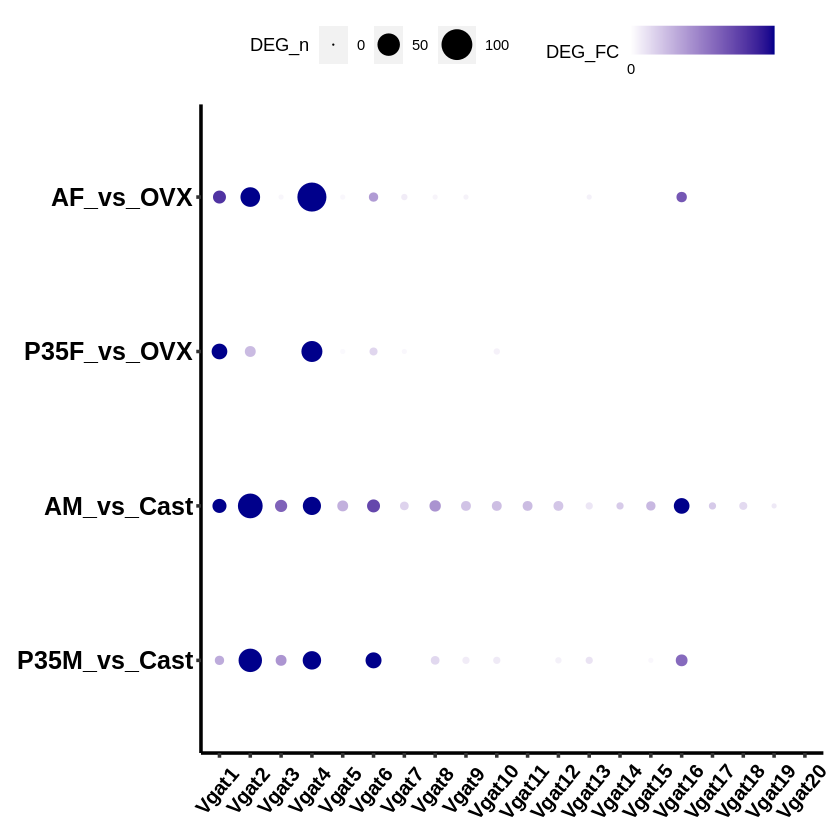

In [34]:
ggplot(df, aes(type, group)) + geom_point(aes(size = DEG_n, colour=DEG_FC)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(0,10),breaks=seq(0,5,10),oob=squish) + scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/transcriptional activity_Fig1.pdf",height=2.7, width= , paper = "letter")

Saving 6.67 x 2.7 in image



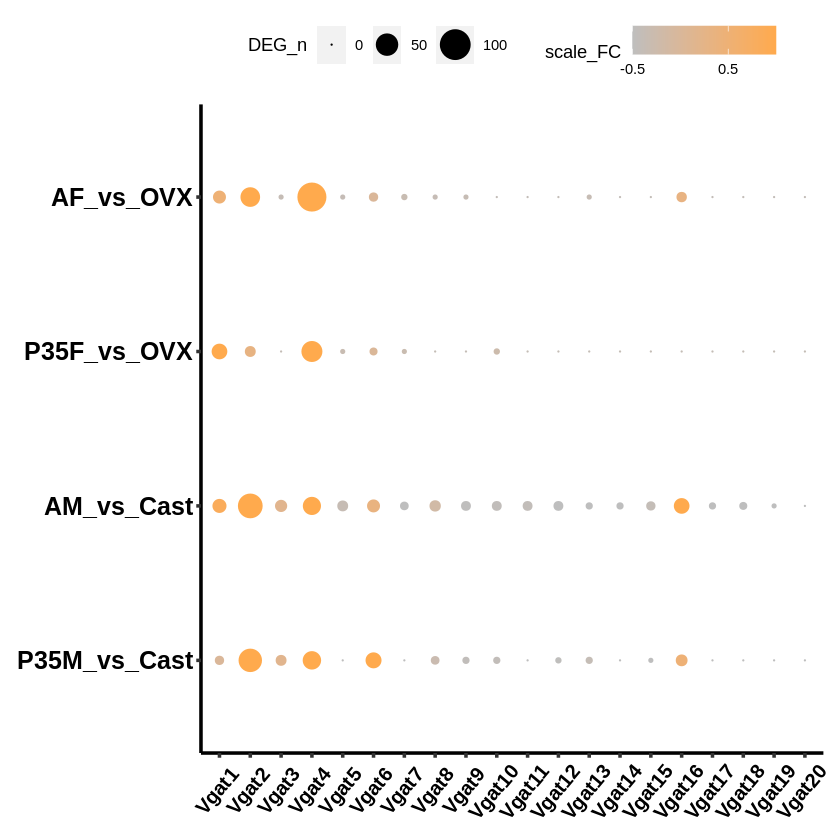

In [19]:
ggplot(df, aes(type, group)) + geom_point(aes(size = DEG_n, colour=scale_FC)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "grey", high = "#ffaa4d",limits = c(-0.5,1),breaks=seq(-0.5,0.5,1),oob=squish) + scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/transcriptional activity_zscore_Fig1_-0.5_1_#ffaa4d.pdf",height=2.7, width= , paper = "letter")

In [46]:
high_C<-"#F9EADD"
middle_C<-"#CB1F4F"
low_C<-"#0E0F1B"

In [81]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"

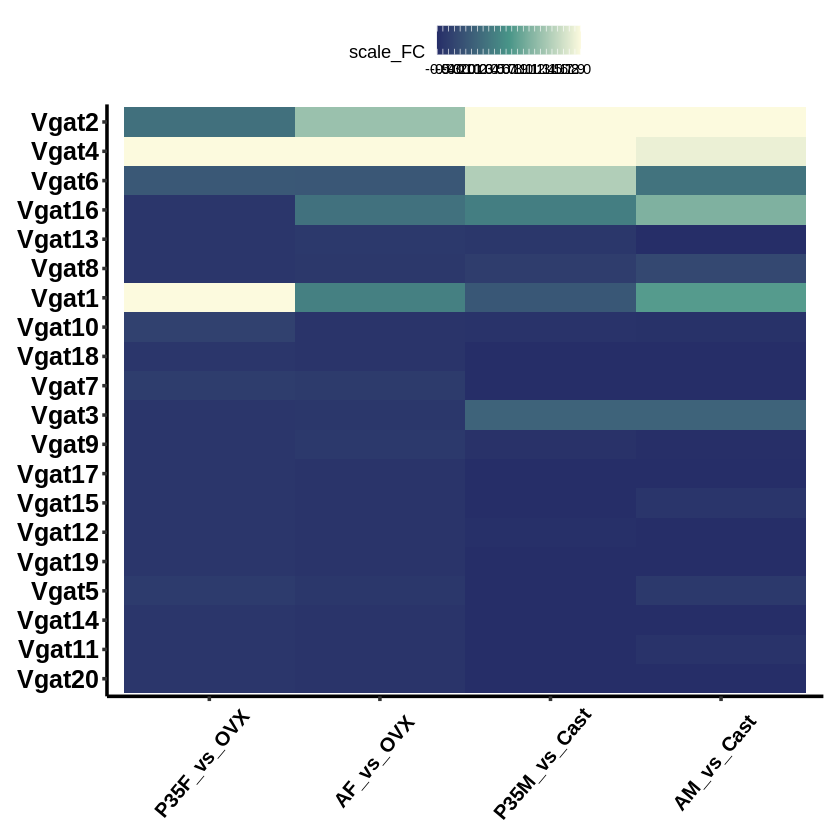

In [90]:
low<--0.5
high<-2
ggplot(df, aes(group, type))  +geom_tile(aes(fill = scale_FC)) +  scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = (low+high)/2,oob=squish)+
scale_x_discrete(limits = rev(levels(df$group)))+scale_y_discrete(limits =rev(levels(df$type)))+

#scale_fill_gradient2(limits=c(low, high), low = low_C,high =high_C,oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/transcriptional activity_zscore_heatmap_Fig1_-0.5_2.pdf",height=10, width=3 , paper = "letter")

# visualizing P23/P35/P50 vs GDX across cell types

In [24]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

Cell_number<- data.frame("type" =Cell_type)

AM_Cast<-vector(mode="numeric", length=0)
AM_Cast_activity<-vector(mode="numeric", length=0)
AM_cell<-vector(mode="numeric", length=0)

P35M_Cast<-vector(mode="numeric", length=0)
P35M_Cast_activity<-vector(mode="numeric", length=0)
P35M_cell<-vector(mode="numeric", length=0)

P23M_Cast<-vector(mode="numeric", length=0)
P23M_Cast_activity<-vector(mode="numeric", length=0)
P23M_cell<-vector(mode="numeric", length=0)

AF_OVX<-vector(mode="numeric", length=0)
AF_OVX_activity<-vector(mode="numeric", length=0)
AF_cell<-vector(mode="numeric", length=0)

P35F_OVX<-vector(mode="numeric", length=0)
P35F_OVX_activity<-vector(mode="numeric", length=0)
P35F_cell<-vector(mode="numeric", length=0)

P23F_OVX<-vector(mode="numeric", length=0)
P23F_OVX_activity<-vector(mode="numeric", length=0)
P23F_cell<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){
#AM_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AM_over_P23M/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AM_Cast_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AM_over_Cast/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AM_Cast[i]<-dim(AM_Cast_gene)[1]  
AM_Cast_activity[i]<-sum(AM_Cast_gene$avg_logFC)

P35M_Cast_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P35M_over_Cast/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P35M_Cast[i]<-dim(P35M_Cast_gene)[1]  
P35M_Cast_activity[i]<-sum(P35M_Cast_gene$avg_logFC)

P23M_Cast_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P23M_over_Cast/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P23M_Cast[i]<-dim(P23M_Cast_gene)[1]  
P23M_Cast_activity[i]<-sum(P23M_Cast_gene$avg_logFC)
    
AM_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))[1]  
P35M_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P35M" & celltype==Cell_type[i]))[1]  
P23M_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P23M" & celltype==Cell_type[i]))[1]     
#AF_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AF_over_P23F/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AF_OVX_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AF_over_OVX/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AF_OVX[i]<-dim(AF_OVX_gene)[1] 
AF_OVX_activity[i]<-sum(AF_OVX_gene$avg_logFC)     
AF_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))[1]   

P35F_OVX_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P35F_over_OVX/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P35F_OVX[i]<-dim(P35F_OVX_gene)[1] 
P35F_OVX_activity[i]<-sum(P35F_OVX_gene$avg_logFC)     
P35F_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P35F" & celltype==Cell_type[i]))[1] 

P23F_OVX_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P23F_over_OVX/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P23F_OVX[i]<-dim(P23F_OVX_gene)[1] 
P23F_OVX_activity[i]<-sum(P23F_OVX_gene$avg_logFC)     
P23F_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P23F" & celltype==Cell_type[i]))[1] }

Cell_number$AM_cell<-AM_cell
Cell_number$AM_Cast<-AM_Cast
Cell_number$AM_Cast_activity<-AM_Cast_activity
Cell_number$AM_cell<-AM_cell

Cell_number$P35M_cell<-P35M_cell
Cell_number$P35M_Cast<-P35M_Cast
Cell_number$P35M_Cast_activity<-P35M_Cast_activity
Cell_number$P35M_cell<-P35M_cell

Cell_number$P23M_cell<-P23M_cell
Cell_number$P23M_Cast<-P23M_Cast
Cell_number$P23M_Cast_activity<-P23M_Cast_activity
Cell_number$P23M_cell<-P23M_cell

Cell_number$AF_cell<-AF_cell
Cell_number$AF_OVX<-AF_OVX
Cell_number$AF_OVX_activity<-AF_OVX_activity
Cell_number$AF_cell<-AF_cell

Cell_number$P35F_cell<-P35F_cell
Cell_number$P35F_OVX<-P35F_OVX
Cell_number$P35F_OVX_activity<-P35F_OVX_activity
Cell_number$P35F_cell<-P35F_cell

Cell_number$P23F_cell<-P23F_cell
Cell_number$P23F_OVX<-P23F_OVX
Cell_number$P23F_OVX_activity<-P23F_OVX_activity
Cell_number$P23F_cell<-P23F_cell

In [25]:
Cell_number_Vgat<-subset(Cell_number, type %in% c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))

In [26]:
Cell_number_Vgat_AM<-Cell_number_Vgat[,c("type","AM_Cast","AM_Cast_activity")]
Cell_number_Vgat_AM$group<-rep("AM_vs_Cast",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_AM)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_AM$scale_FC<-scale(Cell_number_Vgat_AM$DEG_FC)

Cell_number_Vgat_P35M<-Cell_number_Vgat[,c("type","P35M_Cast","P35M_Cast_activity")]
Cell_number_Vgat_P35M$group<-rep("P35M_vs_Cast",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P35M)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P35M$scale_FC<-scale(Cell_number_Vgat_P35M$DEG_FC)

Cell_number_Vgat_P23M<-Cell_number_Vgat[,c("type","P23M_Cast","P23M_Cast_activity")]
Cell_number_Vgat_P23M$group<-rep("P23M_vs_Cast",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P23M)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P23M$scale_FC<-scale(Cell_number_Vgat_P23M$DEG_FC)

Cell_number_Vgat_AF<-Cell_number_Vgat[,c("type","AF_OVX","AF_OVX_activity")]
Cell_number_Vgat_AF$group<-rep("AF_vs_OVX",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_AF)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_AF$scale_FC<-scale(Cell_number_Vgat_AF$DEG_FC)

Cell_number_Vgat_P35F<-Cell_number_Vgat[,c("type","P35F_OVX","P35F_OVX_activity")]
Cell_number_Vgat_P35F$group<-rep("P35F_vs_OVX",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P35F)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P35F$scale_FC<-scale(Cell_number_Vgat_P35F$DEG_FC)

Cell_number_Vgat_P23F<-Cell_number_Vgat[,c("type","P23F_OVX","P23F_OVX_activity")]
Cell_number_Vgat_P23F$group<-rep("P23F_vs_OVX",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P23F)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P23F$scale_FC<-scale(Cell_number_Vgat_P23F$DEG_FC)

df<-rbind(Cell_number_Vgat_AM,Cell_number_Vgat_P35M)
df<-rbind(df,Cell_number_Vgat_P23M)
df<-rbind(df,Cell_number_Vgat_AF)
df<-rbind(df,Cell_number_Vgat_P35F)
df<-rbind(df,Cell_number_Vgat_P23F)

In [27]:
df$type<-factor(df$type,levels=c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))

In [28]:
df$group<-factor(df$group,levels=rev(c("P23F_vs_OVX","P35F_vs_OVX","AF_vs_OVX","P23M_vs_Cast","P35M_vs_Cast","AM_vs_Cast")))

In [29]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"

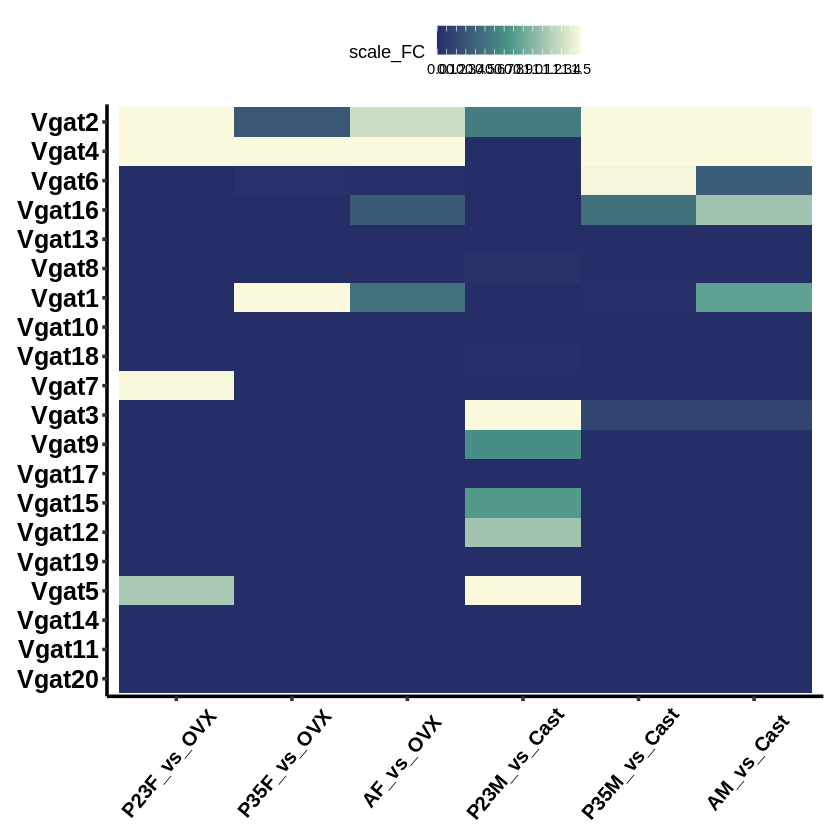

In [30]:
low<-0
high<-1.5
ggplot(df, aes(group, type))  +geom_tile(aes(fill = scale_FC)) +  scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = (low+high)/2,oob=squish)+
scale_x_discrete(limits = rev(levels(df$group)))+scale_y_discrete(limits =rev(levels(df$type)))+

#scale_fill_gradient2(limits=c(low, high), low = low_C,high =high_C,oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/transcriptional activity_zscore_heatmap_all_vs_GDX_Fig1_0.5_1.5.pdf",height=10, width=3 , paper = "letter")

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Saving 6.67 x 2.7 in image

Warning message:
“Removed 1 rows containing missing values (geom_point).”


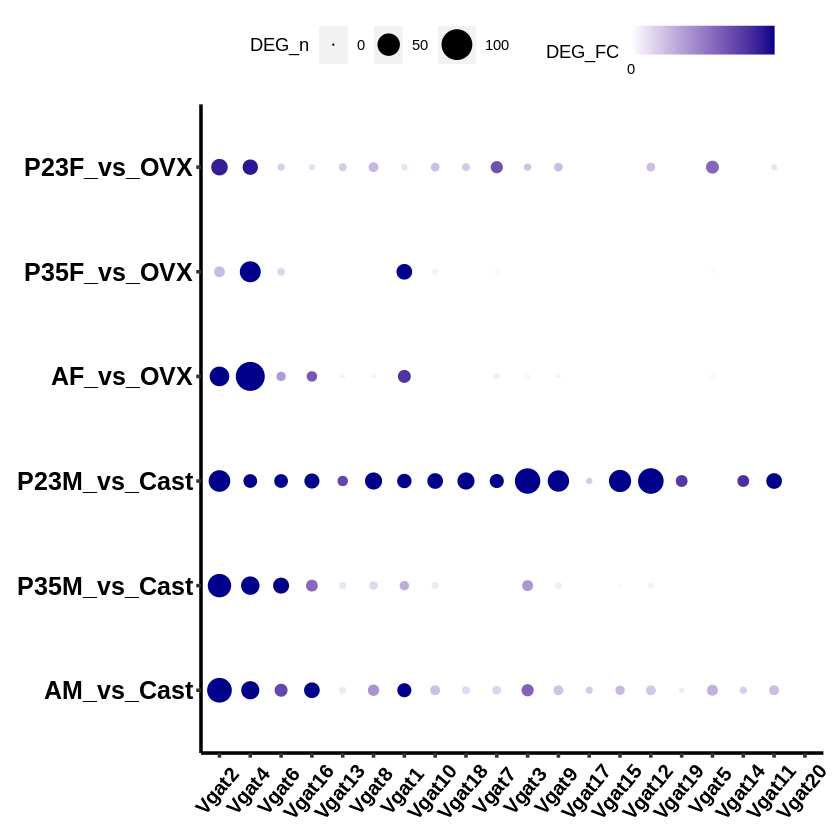

In [31]:
ggplot(df, aes(type, group)) + geom_point(aes(size = DEG_n, colour=DEG_FC)) + 
scale_x_discrete(limits = rev(levels(Cell_number$cluster)))+scale_y_discrete(limits =rev(levels(Cell_number$gene)))+
scale_color_gradient(low = "white", high = "darkblue",limits = c(0,10),breaks=seq(0,5,10),oob=squish) + scale_size_continuous(range = c(0,8),limits=c(0,100),breaks=seq(0,100,50))+
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/transcriptional activity_all_vsGDX_Fig1.pdf",height=2.7, width= , paper = "letter")

# visualizing P35M/P50 vs P23 across cell type

In [11]:
Cell_type<-c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20","Vglu1","Vglu2","Vglu3","Vglu4","Vglu5","Vglu6","Vglu7","Vglu8","Vglu9","Vglu10","Vglu11","Vglu12")

Cell_number<- data.frame("type" =Cell_type)

AM_P23M<-vector(mode="numeric", length=0)
AM_P23M_activity<-vector(mode="numeric", length=0)
AM_cell<-vector(mode="numeric", length=0)

P35M_P23M<-vector(mode="numeric", length=0)
P35M_P23M_activity<-vector(mode="numeric", length=0)
P35M_cell<-vector(mode="numeric", length=0)

AF_P23F<-vector(mode="numeric", length=0)
AF_P23F_activity<-vector(mode="numeric", length=0)
AF_cell<-vector(mode="numeric", length=0)

P35F_P23F<-vector(mode="numeric", length=0)
P35F_P23F_activity<-vector(mode="numeric", length=0)
P35F_cell<-vector(mode="numeric", length=0)

for (i in 1:dim(Cell_number)[1]){
#AM_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AM_over_P23M/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AM_P23M_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AM_over_P23M/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AM_P23M[i]<-dim(AM_P23M_gene)[1]  
AM_P23M_activity[i]<-sum(AM_P23M_gene$avg_logFC)
P35M_P23M_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P35M_over_P23M/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P35M_P23M[i]<-dim(P35M_P23M_gene)[1]  
P35M_P23M_activity[i]<-sum(P35M_P23M_gene$avg_logFC)

AM_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AM" & celltype==Cell_type[i]))[1]  
P35M_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P35M" & celltype==Cell_type[i]))[1]  
#AF_23_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/P23M_P35M_AM_Cast_P23F_P35F_AF_OVX/Neurons/0.6/DEG_raw_data/AF_over_P23F/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AF_P23F_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/AF_over_P23F/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
AF_P23F[i]<-dim(AF_P23F_gene)[1] 
AF_P23F_activity[i]<-sum(AF_P23F_gene$avg_logFC)     
AF_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="AF" & celltype==Cell_type[i]))[1]   
P35F_P23F_gene<-read.xlsx(paste("/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/Ind/P35F_over_P23F/",Cell_type[i],"_gene_adjust.xlsx",sep=""),sheetIndex=1)
P35F_P23F[i]<-dim(P35F_P23F_gene)[1] 
P35F_P23F_activity[i]<-sum(P35F_P23F_gene$avg_logFC)     
P35F_cell[i]<-dim(subset(MPOA.integrated@meta.data,stim=="P35F" & celltype==Cell_type[i]))[1] }

Cell_number$AM_cell<-AM_cell
Cell_number$AM_P23M<-AM_P23M
Cell_number$AM_P23M_activity<-AM_P23M_activity
Cell_number$AM_cell<-AM_cell

Cell_number$P35M_cell<-P35M_cell
Cell_number$P35M_P23M<-P35M_P23M
Cell_number$P35M_P23M_activity<-P35M_P23M_activity
Cell_number$P35M_cell<-P35M_cell

Cell_number$AF_cell<-AF_cell
Cell_number$AF_P23F<-AF_P23F
Cell_number$AF_P23F_activity<-AF_P23F_activity
Cell_number$AF_cell<-AF_cell

Cell_number$P35F_cell<-P35F_cell
Cell_number$P35F_P23F<-P35F_P23F
Cell_number$P35F_P23F_activity<-P35F_P23F_activity
Cell_number$P35F_cell<-P35F_cell
#as.factor(Cell_number$type)

In [12]:
Cell_number_Vgat<-subset(Cell_number, type %in% c("Vgat1","Vgat2","Vgat3","Vgat4","Vgat5","Vgat6","Vgat7","Vgat8","Vgat9","Vgat10","Vgat11","Vgat12","Vgat13","Vgat14","Vgat15","Vgat16","Vgat17","Vgat18","Vgat19","Vgat20"))

In [13]:
Cell_number_Vgat_AM<-Cell_number_Vgat[,c("type","AM_P23M","AM_P23M_activity")]
Cell_number_Vgat_AM$group<-rep("AM_vs_P23M",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_AM)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_AM$scale_FC<-scale(Cell_number_Vgat_AM$DEG_FC)
Cell_number_Vgat_P35M<-Cell_number_Vgat[,c("type","P35M_P23M","P35M_P23M_activity")]
Cell_number_Vgat_P35M$group<-rep("P35M_vs_P23M",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P35M)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P35M$scale_FC<-scale(Cell_number_Vgat_P35M$DEG_FC)
Cell_number_Vgat_AF<-Cell_number_Vgat[,c("type","AF_P23F","AF_P23F_activity")]
Cell_number_Vgat_AF$group<-rep("AF_vs_P23F",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_AF)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_AF$scale_FC<-scale(Cell_number_Vgat_AF$DEG_FC)
Cell_number_Vgat_P35F<-Cell_number_Vgat[,c("type","P35F_P23F","P35F_P23F_activity")]
Cell_number_Vgat_P35F$group<-rep("P35F_vs_P23F",dim(Cell_number_Vgat)[1])
colnames(Cell_number_Vgat_P35F)<-c("type","DEG_n","DEG_FC","group")
Cell_number_Vgat_P35F$scale_FC<-scale(Cell_number_Vgat_P35F$DEG_FC)
df<-rbind(Cell_number_Vgat_AM,Cell_number_Vgat_P35M)
df<-rbind(df,Cell_number_Vgat_AF)
df<-rbind(df,Cell_number_Vgat_P35F)

In [14]:
df$type<-factor(df$type,levels=c("Vgat2","Vgat4","Vgat6","Vgat16","Vgat13","Vgat8","Vgat1","Vgat10","Vgat18","Vgat7","Vgat3","Vgat9","Vgat17","Vgat15","Vgat12","Vgat19","Vgat5","Vgat14","Vgat11","Vgat20"))

In [15]:
df$group<-factor(df$group,levels=rev(c("P35F_vs_P23F","AF_vs_P23F","P35M_vs_P23M","AM_vs_P23M")))

In [16]:
high_C<-"#FCFADE"
middle_C<-"#489588"
low_C<-"#262E68"

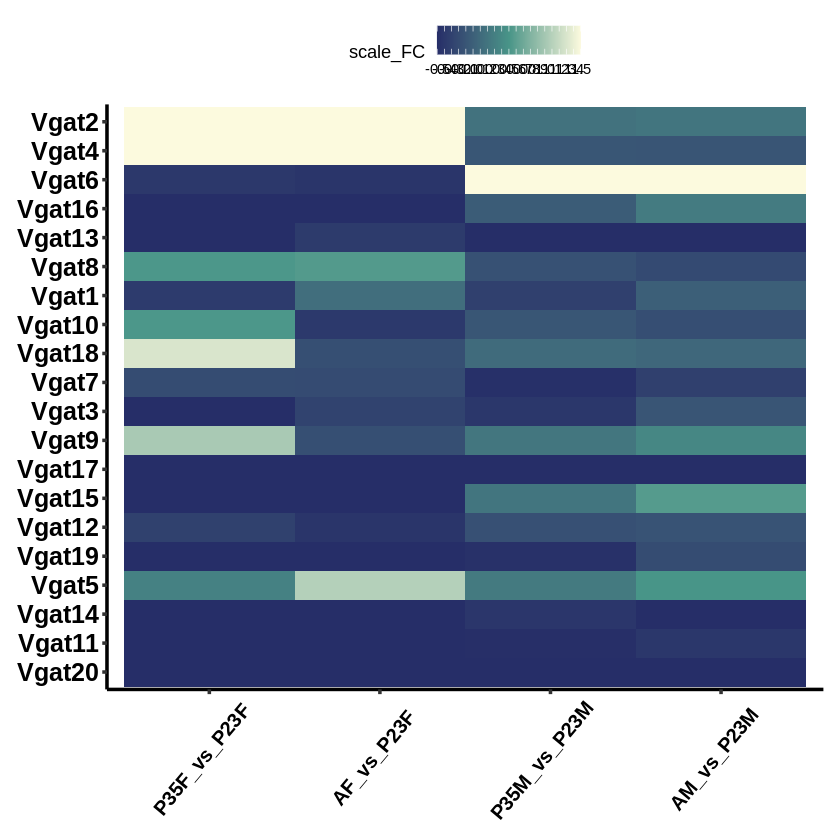

In [19]:
low<--0.5
high<-1.5
ggplot(df, aes(group, type))  +geom_tile(aes(fill = scale_FC)) +  scale_fill_gradient2(limits=c(low, high), breaks=seq(low,high,by=0.1),low = low_C,mid=middle_C,high =high_C,  midpoint = (low+high)/2,oob=squish)+
scale_x_discrete(limits = rev(levels(df$group)))+scale_y_discrete(limits =rev(levels(df$type)))+

#scale_fill_gradient2(limits=c(low, high), low = low_C,high =high_C,oob=squish) + 
geom_point(aes(size = pct), pch=21,, lwd=0,stroke=0)+
theme(axis.title=element_blank(),axis.text.y=element_text(size=15,color="black",face="bold"),axis.text.x=element_text(size=12,angle = 50, hjust = 0.6,vjust=0.6,color="black",face="bold"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black",size=1),legend.position ="top",axis.ticks.length=unit(.1, "cm"),axis.ticks = element_line(size = 1), plot.margin = margin(10, 10, 10, 10))
ggsave(file="/media/garret/New Volume/scRNAseq_data/Koichi/V3_analysis/MPOA/MPOA_integrated/log/Neurons/DEG/correlation/transcriptional activity_zscore_heatmapP_compared_to_23_Fig1_-0.5_1.5.pdf",height=10, width=3 , paper = "letter")